In [123]:
import os
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, confusion_matrix

In [124]:
#to read points from txt files
def readTXTpoints(filepath):
    filepath = os.getcwd() + filepath
    f = open(filepath,'r')
    temp=[]
    for i in f.readlines():
        x,y=[float(t) for t in i.split()]
        temp.append([x,y])
    X=np.array(temp)
    return X # array of all points

#to make y as K dimensional classfication output (k = number of classes, here 3)
def clas(y):
    y = np.fromiter(map(int, y), dtype = np.int)
    y_temp = []
    for i in range(len(y)):
        temp = [0,0,0] #3 classes
        temp[y[i]] = 1
        y_temp.append(temp)
    return np.array(y_temp)

#to seperate X and y features
def xy(data):
    X=[]
    y=[]
    for i,j in enumerate(data):
        for c in j:
            y.append(i)
            X.append(c)
    return np.array(X),clas(np.array(y)) #X and y features

#to read points from csv files and get X and y features
def readCSVpoints(filepath):
    filepath = os.getcwd() + filepath
    df = pd.read_csv(filepath)
    mylist = df.to_numpy()
    X=[]
    y=[]
    for i in range(len(mylist)):
        X.append(mylist[i][:-1])
        y.append(mylist[i][-1])    
    return [X,y] # X and y features

def TrainValidateTestSplit(x, Y):
    """
    Splits into TrainData, ValidateData, TestData
    Output: 6 arrays i.e. X_train, X_validate, X_test, y_train, y_validate, y_test
    """
    class_points = len(Y)//3 #points per class
    index = 0
    X_train, X_validate, X_test, y_train, y_validate, y_test = [],[],[],[],[],[]
    for i in range(3):
        X = x[index:index+class_points]
        y = Y[index:index+class_points]
        index = index+class_points
        # randomly shuffled data in each class
        temp = list(zip(X, y))  
        random.shuffle(temp)
        X, y = zip(*temp)
        #split train-validate-test data as 60:20:20
        X_train += X[0:int(.6*len(X))]
        X_validate += X[int(.6*len(X)):int(.8*len(X))]
        X_test += X[int(.8*len(X)):int(len(X))]
        y_train += y[0:int(.6*len(y))]
        y_validate += y[int(.6*len(y)):int(.8*len(y))]
        y_test += y[int(.8*len(y)):int(len(y))]   
    return np.array(X_train), np.array(X_validate), np.array(X_test), np.array(y_train), np.array(y_validate), np.array(y_test)

def TrainValidateSplit(x, Y):
    """
    Splits into TrainData, ValidateData
    Output: 4 arrays i.e. X_train, X_validate, y_train, y_validate
    """
    Y = clas(Y)
    class_points = len(Y)//3 #points per class
    #print(class_points)
    index = 0
    X_train, X_validate, y_train, y_validate = [],[],[],[]

    for i in range(3):
        X = x[index:index+class_points]
        y = Y[index:index+class_points]
        index = index+class_points
        # randomly shuffled data in each class
        temp = list(zip(X, y))  
        random.shuffle(temp)
        X, y = zip(*temp)
        #split train-validate image data as 40:10 i.e. 80:20
        X_train += X[0:int(.8*len(X))]
        X_validate += X[int(.8*len(X)):int(len(X))]
        y_train += y[0:int(.8*len(y))]
        y_validate += y[int(.8*len(y)):int(len(y))]
    return np.array(X_train), np.array(X_validate), np.array(y_train), np.array(y_validate)

In [125]:
# Load All Data
# Code to generate TrainData, ValidateData, TestData in comments under their respective dataset

ls_c1 = readTXTpoints("/Group20/Classification/LS_Group20/Class1.txt")
ls_c2 = readTXTpoints("/Group20/Classification/LS_Group20/Class2.txt")
ls_c3 = readTXTpoints("/Group20/Classification/LS_Group20/Class3.txt")
ls_data = [ls_c1, ls_c2, ls_c3]
# X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(xy(ls_data)[0],xy(ls_data)[1])

nls = readTXTpoints("/Group20/Classification/NLS_Group20.txt")
nls_data = [nls[i:i + 500] for i in range(0, len(nls), 500)]
# X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(xy(nls_data)[0],xy(nls_data)[1])

img_data_train = readCSVpoints("/Group20/Classification/Image_Group20/trainBOVW.csv")
img_data_test = readCSVpoints("/Group20/Classification/Image_Group20/testBOVW.csv")
# [X_train, X_validate, y_train, y_validate],  X_test, y_test = TrainValidateSplit(img_data_train[0], img_data_train[1]), img_data_test[0], clas(img_data_test[1])

uni_data = readCSVpoints("/Group20/Regression/UnivariateData/20.csv")
# X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(uni_data[0],uni_data[1])

bi_data = readCSVpoints("/Group20/Regression/BivariateData/20.csv")
# X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(bi_data[0],bi_data[1])

In [126]:
#train each node for training tuples
def node_trainer(X, Y, epochs, l_rate, activation_function ):
    w = np.random.rand(X.shape[1]+1)
    avg_error = 0.0
  
    for epoch in range(epochs):
        for x, label in zip(X, Y):
            x = np.insert(x,0,1)
            y = np.dot(w, x.T)
            if activation_function == "sigmoidal":
                target = 1.0/(1.0 +math.exp(-y))
                #binary cross entropy loss function------------------------------------------
                # delta = -(label/target - (1-label)/(1-target))
                # w -= l_rate*(delta*target)*(1-target)*x
                # if(epoch == epochs-1):
                #     avg_error += -(label*math.log2(target) + (1-label)*math.log2(1-target))
                #----------------------------------------------------------------------------
                #mean squared error loss function--------------------------------------------
                delta = -(label-target)
                w -= l_rate*(delta*x)
                if(epoch == epochs-1):
                    avg_error += 0.5*(label-target)*(label-target)
                #----------------------------------------------------------------------------

            elif activation_function == "linear":
                target = float(y)
                delta = -(label-target)
                w -= l_rate*(delta*x)
                if(epoch == epochs-1):
                    avg_error += 0.5*(label-target)*(label-target)
    return w, avg_error/len(X)

#predict output of a node for one tuple
def node_predict(w, row, activation_function):
    row = np.insert(row,0,1)
    y = np.dot(w, row.T)
    if activation_function == "sigmoidal":
        target = 1.0/(1.0 +math.exp(-float(y)))
    elif activation_function == "linear":
        target = float(y)
    return target

# Calculate accuracy percentage
def classification_accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if np.array_equal(np.array(actual[i]), np.array(predicted[i])):
			correct += 1
	return correct / float(len(actual)) * 100.0

def model_train(X_train, y_train, epochs, l_rate, activation_function):
    if(activation_function == "sigmoidal"):
        w = []
        avg_error= 0.0
        for j in range(len(y_train[0])):
            y_train_part = [y_train[i][j] for i in range(len(y_train))]
            w_part, avg_error_part = node_trainer(X_train, y_train[j], epochs, l_rate, activation_function)
            w.append(w_part)
            avg_error += avg_error_part
    elif (activation_function == "linear"):
        w, avg_error = node_trainer(X_train, y_train, epochs, l_rate, activation_function)
        
    return w, avg_error

def model_predict(w, X, y, activation_function):
    if(activation_function == "sigmoidal"):
        predicted = []
        for i in range(len(X)):
            pred = [0,0,0]
            #highest probability of belonging to a certain class determines class of predicted
            pred[np.argmax(np.array([node_predict(w[0], X[i], activation_function), node_predict(w[1], X[i], activation_function), node_predict(w[2], X[i], activation_function)]))] = 1
            predicted.append(pred)
        return classification_accuracy_metric(y, predicted), predicted
    elif (activation_function == "linear"):
        predicted = [node_predict(w, X[i], activation_function) for i in range(len(X))]
        return -1.0*mean_squared_error(y, predicted), predicted


def grid_search(X_train, y_train, X_validate, y_validate, l_rate, epochs_all, activation_function):
    model_accuracy = []
    model_avg_error = []
    model_complexity = []
    for epochs in epochs_all:
        w, avg_error = model_train(X_train, y_train, epochs, l_rate, activation_function)
        #validating model
        model_avg_error.append(avg_error)
        #model_accuracy is avg_classification_accuracy in classification task and negative of mean_squared_error in regression task (negative so as to help while sorting)
        model_accuracy.append(model_predict(w, X_validate, y_validate, activation_function)[0])
        model_complexity.append(epochs)
        #print(classification_model_predict(w, X_validate, y_validate, activation_function)[1])
    epoch_vs_error = [epochs_all, model_avg_error]
    model_accuracy, model_complexity = zip(*sorted(zip(model_accuracy,model_complexity), reverse=True))
    
    return model_complexity, model_accuracy, avg_error, epoch_vs_error


In [153]:

def decision_plot(w, X, y, y_predicted):
    plt.title("Decision plot")
    plt.xlabel("X-axis representation of actual data")
    plt.ylabel("Y-axis representation of actual data")
    
    plt.scatter([X[i][0] for i in range(len(X)) if np.argmax(y[i]) == 0],[X[i][1] for i in range(len(X)) if np.argmax(y[i]) == 0])
    plt.scatter([X[i][0] for i in range(len(X)) if np.argmax(y[i]) == 1],[X[i][1] for i in range(len(X)) if np.argmax(y[i]) == 1])
    plt.scatter([X[i][0] for i in range(len(X)) if np.argmax(y[i]) == 2],[X[i][1] for i in range(len(X)) if np.argmax(y[i]) == 2])
    
    x_min, x_max=min([X[i][0] for i in range(len(X))]), max([X[i][0] for i in range(len(X))])

    for i in range(len(w)):
        weight = w[i]
        x_range = np.linspace(x_min, x_max, 100)
        y_range = [(0.5-weight[0]-weight[1]*x)/weight[2] for x in x_range]
        class_legend = "C " +str(i+1)
        plt.plot(x_range, y_range, label=class_legend)
    plt.legend()
    plt.show()

    plt.title("Decision plot")
    plt.xlabel("X-axis representation of predicted data")
    plt.ylabel("Y-axis representation of predicted data")
    plt.scatter([X[i][0] for i in range(len(X)) if np.argmax(y_predicted[i]) == 0],[X[i][1] for i in range(len(X)) if np.argmax(y_predicted[i]) == 0])
    plt.scatter([X[i][0] for i in range(len(X)) if np.argmax(y_predicted[i]) == 1],[X[i][1] for i in range(len(X)) if np.argmax(y_predicted[i]) == 1])
    plt.scatter([X[i][0] for i in range(len(X)) if np.argmax(y_predicted[i]) == 2],[X[i][1] for i in range(len(X)) if np.argmax(y_predicted[i]) == 2])
    plt.show()
    return

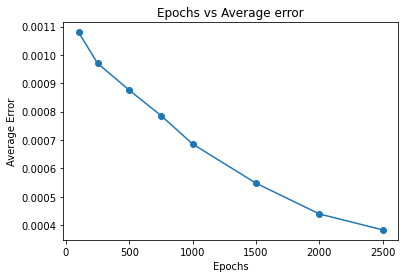

Best test accuracy for this model for is:  47.333333333333336  for epochs value =  100 

Confusion matrix is:
 [[ 42  56   2]
 [  0 100   0]
 [100   0   0]] 



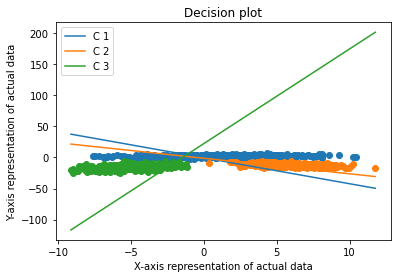

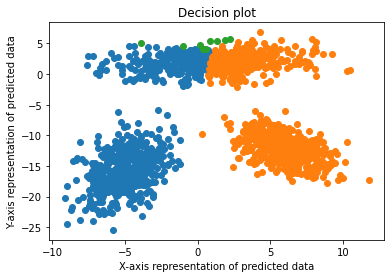

In [128]:
X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(xy(ls_data)[0],xy(ls_data)[1])
l_rate = 0.01
epochs_all = [100,250,500,750,1000,1500,2000,2500]
activation_function = "sigmoidal"
#print(y_validate)
model_complexity, model_accuracy, avg_error, epoch_vs_error = grid_search(X_train, y_train, X_validate, y_validate, l_rate, epochs_all, activation_function)

plt.title("Epochs vs Average error")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.scatter(epoch_vs_error[0], epoch_vs_error[1])
plt.plot(epoch_vs_error[0], epoch_vs_error[1])
plt.show()

best_hyperparameter = model_complexity[0]

w, _ = model_train(X_train, y_train, best_hyperparameter, l_rate, activation_function)
_,predicted_train = model_predict(w, X_train, y_train, activation_function)
_, predicted_validate = model_predict(w, X_validate, y_validate, activation_function)
max_accuracy, predicted = model_predict(w, X_test, y_test, activation_function)

print("Best test accuracy for this model for is: ", max_accuracy, " for epochs value = ", best_hyperparameter, "\n")

predicted_dash = [np.argmax(np.array(predicted[i])) for i in range(len(predicted))]
actual_dash = [np.argmax(np.array(y_test[i])) for i in range(len(predicted))]

print("Confusion matrix is:\n", confusion_matrix(actual_dash,predicted_dash), "\n")

decision_plot(w, np.concatenate((X_train,X_validate,X_test), axis =0), np.concatenate((y_train,y_validate,y_test), axis =0), np.concatenate((predicted_train,predicted_validate,predicted), axis =0))

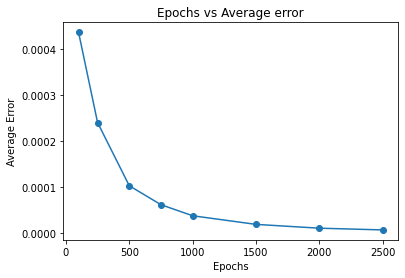

Best test accuracy for this model for is:  24.666666666666668  for epochs value =  2000 

Confusion matrix is:
 [[  3  69  28]
 [ 12  71  17]
 [  0 100   0]] 



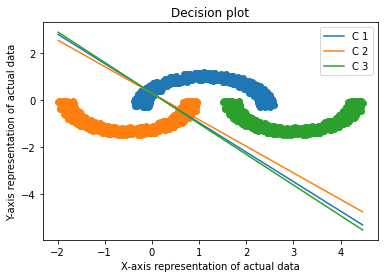

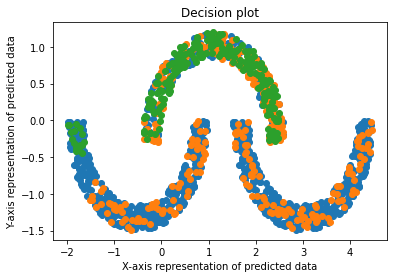

In [119]:
X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(xy(nls_data)[0],xy(nls_data)[1])
l_rate = 0.01
epochs_all = [100,250,500,750,1000,1500,2000,2500]
activation_function = "sigmoidal"
#print(y_validate)
model_complexity, model_accuracy, avg_error, epoch_vs_error = grid_search(X_train, y_train, X_validate, y_validate, l_rate, epochs_all, activation_function)

plt.title("Epochs vs Average error")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.scatter(epoch_vs_error[0], epoch_vs_error[1])
plt.plot(epoch_vs_error[0], epoch_vs_error[1])
plt.show()

best_hyperparameter = model_complexity[0]

w, _ = model_train(X_train, y_train, best_hyperparameter, l_rate, activation_function)
max_accuracy, predicted = model_predict(w, X_test, y_test, activation_function)

print("Best test accuracy for this model for is: ", max_accuracy, " for epochs value = ", best_hyperparameter, "\n")

predicted_dash = [np.argmax(np.array(predicted[i])) for i in range(len(predicted))]
actual_dash = [np.argmax(np.array(y_test[i])) for i in range(len(predicted))]

print("Confusion matrix is:\n", confusion_matrix(actual_dash,predicted_dash), "\n")

decision_plot(w, np.concatenate((X_train,X_validate,X_test), axis =0), np.concatenate((y_train,y_validate,y_test), axis =0), np.concatenate((predicted_train,predicted_validate,predicted), axis =0))

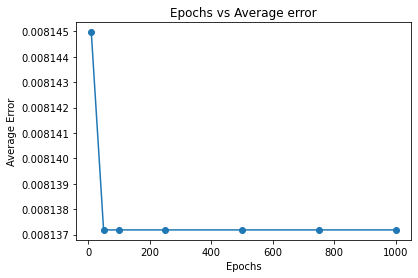

Best test MSE for this model for is:  0.014346618367597248  for epochs value =  100 



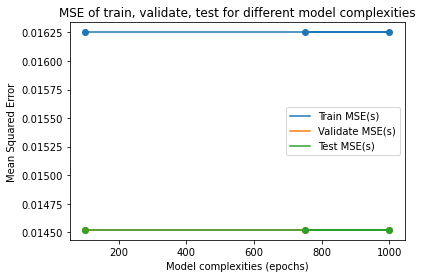

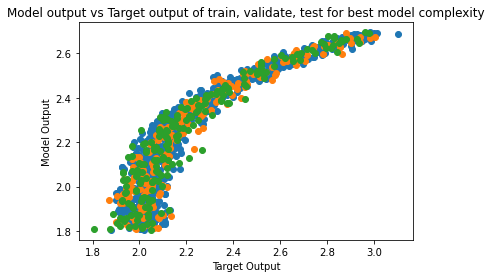

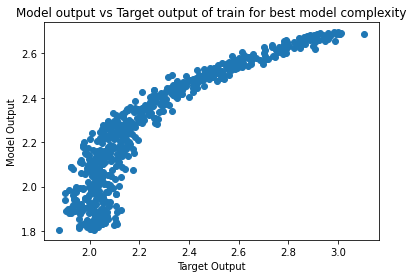

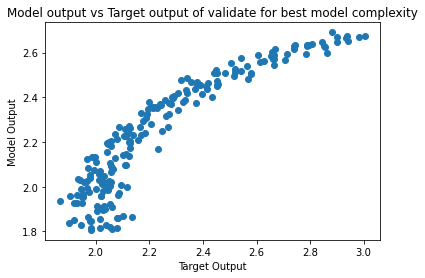

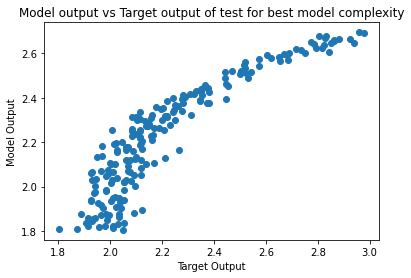

In [151]:
X_train, X_validate, X_test, y_train, y_validate, y_test = TrainValidateTestSplit(uni_data[0],uni_data[1])
l_rate = 0.01
epochs_all = [10,50,100,250,500,750,1000]
activation_function = "linear"
#print(y_validate)
model_complexity, model_accuracy, avg_error, epoch_vs_error = grid_search(X_train, y_train, X_validate, y_validate, l_rate, epochs_all, activation_function)

plt.title("Epochs vs Average error")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.scatter(epoch_vs_error[0], epoch_vs_error[1])
plt.plot(epoch_vs_error[0], epoch_vs_error[1])
plt.show()

best_hyperparameters = model_complexity[:3]
best_MSE = [[],[],[]]
predicted_train, predicted_validate, predicted = np.array([]),np.array([]),np.array([])
for i in reversed(range(len(best_hyperparameters))):
    w, _ = model_train(X_train, y_train, best_hyperparameter, l_rate, activation_function)
    mse_train,predicted_train = model_predict(w, X_train, y_train, activation_function)
    mse_validate, predicted_validate = model_predict(w, X_validate, y_validate, activation_function)
    mse_test, predicted = model_predict(w, X_test, y_test, activation_function)
    best_MSE[0].append(-1.0*mse_train)
    best_MSE[1].append(-1.0*mse_validate)
    best_MSE[2].append(-1.0*mse_test)

print("Best test MSE for this model for is: ", best_MSE[-1][-1], " for epochs value = ", best_hyperparameters[0], "\n")

plt.title("MSE of train, validate, test for different model complexities")
plt.xlabel("Model complexities (epochs)")
plt.ylabel("Mean Squared Error")
plt.scatter(best_hyperparameters, best_MSE[0][::-1])
plt.plot(best_hyperparameters, best_MSE[0][::-1],  label = "Train MSE(s)") #train MSE(s) for different model complexities
plt.scatter(best_hyperparameters, best_MSE[1][::-1])
plt.plot(best_hyperparameters, best_MSE[1][::-1], label = "Validate MSE(s)") #validate MSE(s) for different model complexities
plt.scatter(best_hyperparameters, best_MSE[1][::-1])
plt.plot(best_hyperparameters, best_MSE[1][::-1], label = "Test MSE(s)") #test MSE(s) for different model complexities
plt.legend()
plt.show()

plt.title("Model output vs Target output of train, validate, test for best model complexity")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.scatter(y_train, predicted_train, label = "Train")
plt.scatter(y_validate, predicted_validate, label = "Validate")
plt.scatter(y_test, predicted, label = "Test")
plt.legend()
plt.show()

#Individual plots for train, validate, test

plt.title("Model output vs Target output of train for best model complexity")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.scatter(y_train, predicted_train, label = "Train")
plt.legend()
plt.show()

plt.title("Model output vs Target output of validate for best model complexity")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.scatter(y_validate, predicted_validate, label = "Validate")
plt.legend()
plt.show()

plt.title("Model output vs Target output of test for best model complexity")
plt.xlabel("Target Output")
plt.ylabel("Model Output")
plt.scatter(y_test, predicted, label = "Test")
plt.legend()
plt.show()